# Intro

In [1]:
import numpy as np

import  matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pandas as pd

import scipy
from scipy import stats

import xarray as xa

In [2]:
def cldtype_plots(dataset, var, contour=False, times_area=True, *args):
    """Plots datasets by cloud type i.e. CTP vs COD.
    dataset: xarray.Dataset    
        The dataset. MUst include cld_area together with the variable to plot.
    var: str
        The variable to plot. Just for the plot title.
    contour: bool
        Whether you want a contour plot. Optional contour args available.
        Default = False
    times_area: bool
        If true, times the dataset by cld_area dataset in the same domain.
        Default = True
    
    Returns
    -------
    Just the plot
    """
    # Turns around the plot, otherwise the pressure is in the x-axis
    if times_area: 
        mean_ds = dataset[f'{var}_cldtyp_mon'] * dataset.cldarea_cldtyp_mon *0.01
    else:
        mean_ds = dataset
        
    mean_ds = mean_ds.mean(['lat', 'lon', 'time']).transpose() 
    
    if contour:
        mean_ds.plot.contourf(extend="max", *args) 
    else:
        mean_ds.plot(cmap= 'plasma', vmin=0, vmax=7)
    
    # The tick labels for the axis are in the dataset comments 
    plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in mean_ds.press.comment.split('-')])
    plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in mean_ds.opt.comment.split('-')])
    tmin = pd.to_datetime(str(dataset.time.min().values)).strftime('%m-%Y')
    tmax = pd.to_datetime(str(dataset.time.max().values)).strftime('%m-%Y')
    plt.title(f'{tmin} to {tmax}, lat=[{dataset.lat.min().data.item()}, {dataset.lat.max().data.item()}],\
 lon=[{dataset.lon.min().data.item()} {dataset.lon.max().data.item()}]')
    plt.suptitle(f'Cloud {var}')

In [3]:
all0205 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [4]:
var = "toa_albedo"
albedo_all= xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2223[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [5]:
var = "iwp"
iwp_all= xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2223[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [6]:
var = "cldtau"
tau_all = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon"]],
                 all2223[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [7]:
var = "toa_lw"
alllw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],], 
               dim='time')

In [8]:
var = "toa_sw"
allsw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],], 
               dim='time')

In [9]:
var = "cldicerad"
rei_all= xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", ]],], 
               dim='time')

In [10]:
#gmst = pd.read_csv("../daa/GLB.Ts+dSST.csv", skiprows=[0])
#gmst = gmst["Year"]
#gmst = gmst.loc[ gmst['Year'] >= 2002 ]
#gmst = gmst.loc[ gmst['Year'] < 2021 ]
#lista_gmst = gmst[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].loc[123:143].values.flatten().tolist()
#2002
#lista_2002 = [0.61,	0.53,	0.63,	.54	,.59	,.44]
#2024
#lista_2024 = [1.24,	1.44,	1.39,	1.31,	1.16,	1.24,	1.20,	1.30,	1.26]	
#lista_gmst = lista_2002 + lista_gmst 
#monthly_gmst = xa.Dataset({"time":alllw.sel(time=ragutime).time, "gmst" : [float(elem) for elem in lista_gmst] })
#monthly_gmst

In [11]:
itcz = slice(0,20)
trop = slice(-30,30)
bret = slice(-15,15)
ocean_only = slice(120,260)
wp = slice(120,160)
cp = slice(160,200)
ep = slice(210,260)
timeMcKim=slice('2006-06-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')
ragutime = slice('2006-06-15T00:00:00.000000000','2020-12-15T00:00:00.000000000' )
atlantic = slice(280,359)

## SST

In [12]:
#st = xa.open_dataset("../daa/HadCrut/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.nc")
#st = st.sel(time=slice('2002-07-16T00:00:00.000000000','2020-12-16T00:00:00.000000000'))

In [13]:
gist = xa.open_dataset("../daa/gistemp1200_GHCNv4_ERSSTv5.nc").sel(lat=trop, time=slice('2002-07-15T00:00:00.000000000','2023-02-15T00:00:00.000000000' ))#
gist

<xarray.Dataset>
Dimensions:      (lat: 30, lon: 180, time: 248, nv: 2)
Coordinates:
  * lat          (lat) float32 -29.0 -27.0 -25.0 -23.0 ... 23.0 25.0 27.0 29.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2023-02-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-07-08 14:05:16 by SBBX_to_nc 2.0 - ILAND=1200,...

# Variables definitions

In [14]:
def netCRE(lw_flxds, sw_flxds, by_frac=False):
    """Calculates the net CRE given any FLx dataset
    
    Parameters
    ----------
    flxds: netcdf Dataset
        A flx dataset
        
    Returns
    -------
    net_cre: netcdf Dataset
        The Net CRE

    Notes
    -----
    Do't need to select cloud area area here because you can select 
    in the whole dataset, which includes cloud area. 
    """

    lw_cre = lw_flxds.toa_lw_clr_mon - lw_flxds.toa_lw_cldtyp_mon
    sw_cre = sw_flxds.toa_sw_clr_mon - sw_flxds.toa_sw_cldtyp_mon
    net_cre = lw_cre + sw_cre

    if by_frac:
        net_cre = net_cre * lw_flxds.cldarea_cldtyp_mon*0.01 
  
    return net_cre


netcre_tropics = netCRE(alllw.sel(lat=trop,), allsw.sel(lat=trop,), by_frac=True)

In [15]:
netcre_ITCZ = netCRE(alllw.sel(lat=itcz, lon=ocean_only), allsw.sel(lat=itcz, lon=ocean_only), by_frac=True)

In [16]:
netcre_ITCZ.mean(["lat","lon"]).sel(press=[4,5,6]).sum(["press", "opt"]).mean()

<xarray.DataArray ()>
array(-4.034135, dtype=float32)

# Bins plots

Text(0.5, 1.0, 'Tropical cloud fraction climatology')

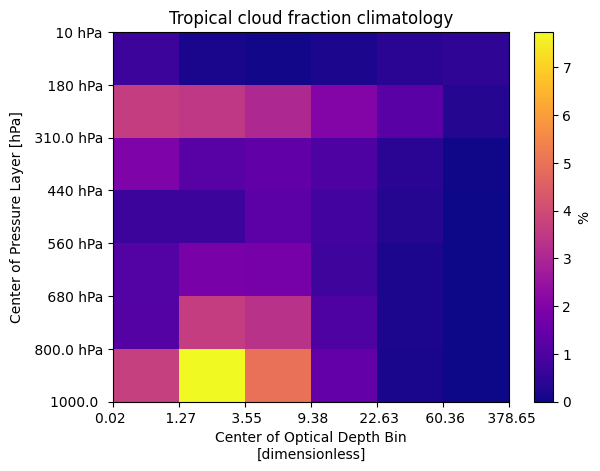

In [17]:
area_trop = tau_all.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime)
ctarea = area_trop.mean(['lat', 'lon', 'time']).transpose().plot(cmap= 'plasma', vmin=0, cbar_kwargs={'label': "%", 'extend': 'neither'})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_trop.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_trop.opt.comment.split('-')])
plt.title('Tropical cloud fraction climatology')
#plt.colorbar set_label('%')

#cldtype_plots(area_trop, var='cldarea', times_area=False)

Text(0.5, 1.0, 'ITCZ cloud fraction climatology')

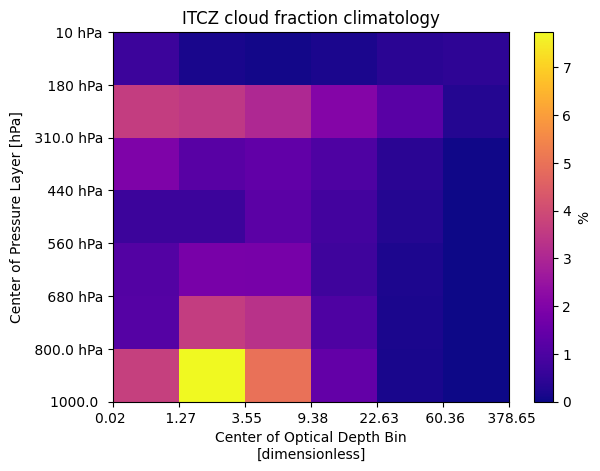

In [18]:
area_itcz = tau_all.cldarea_cldtyp_mon.sel(lat=itcz, lon=ocean_only, time=ragutime)
ctarea = area_trop.mean(['lat', 'lon', 'time']).transpose().plot(cmap= 'plasma', vmin=0, cbar_kwargs={'label': "%", 'extend': 'neither'})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_trop.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_trop.opt.comment.split('-')])
plt.title('ITCZ cloud fraction climatology')
#plt.colorbar set_label('%')

#cldtype_plots(area_trop, var='cldarea', times_area=False)

In [19]:
area_trop_latlon = area_trop.sel(time=ragutime).mean(['time',])

## Reproducing Raghuramans plot

Time: from 07/2002 to 12/2020

In [20]:
#Area anomaly
area_monthclim_trop = area_trop.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month').mean('time')
area_anom = area_trop.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month') - area_monthclim_trop #esto tieme time = 248 ? no deberian ser 12?

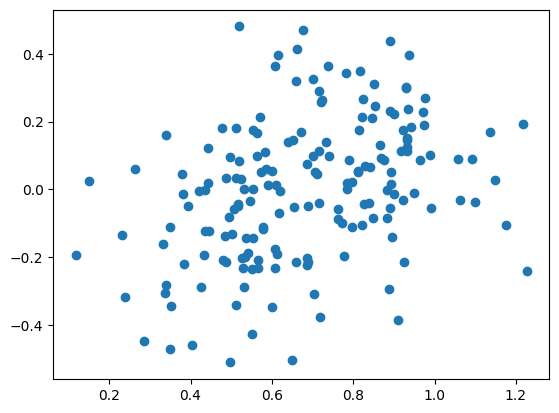

In [21]:
stanom = gist.sel(time=ragutime).tempanomaly.mean(['lat','lon']) #tropical-mean surf temp anomaly
bin = area_anom.sel(press=5, opt=0) #tropical-mean cc anomaly for one grid cell
plt.scatter(stanom, bin)

In [22]:

res = stats.linregress(stanom, bin)
res
#sin anomaly slope =0.32 con anonmaly slope =0.37

LinregressResult(slope=0.3399575664693605, intercept=-0.23258892054099548, rvalue=0.3601969305776819, pvalue=9.772509460824333e-07, stderr=0.06693999990494734, intercept_stderr=0.04810233616078506)

In [23]:
m = np.zeros([7,6])
print(m)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [24]:
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bin = area_anom.sel(press=p, opt=od)
        a = stats.linregress(stanom, bin,).slope
        m[p, od] = a

In [25]:
sens = xa.DataArray(m, 
                    coords={"press": area_trop.press, "opt":area_trop.opt, 
                           },
                   )

Text(0.5, 1.0, 'Tropical cloud cover sensitivity')

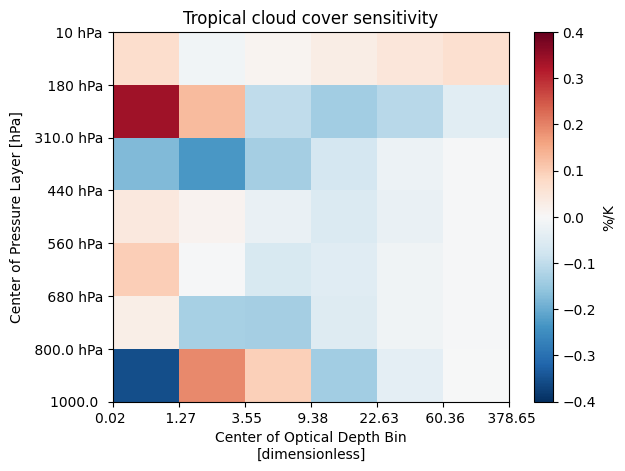

In [26]:
sens.plot(vmin=-0.4, vmax=0.4, cmap='RdBu_r', cbar_kwargs={'label': "%/K"})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_trop.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_trop.opt.comment.split('-')])
plt.title('Tropical cloud cover sensitivity')
#plt.savefig('sens_trop.png')

## Sensitivity for ITCZ

In [27]:
area_monthclim_itcz = area_itcz.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month').mean('time')
area_anom_itcz = area_itcz.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month') - area_monthclim_itcz

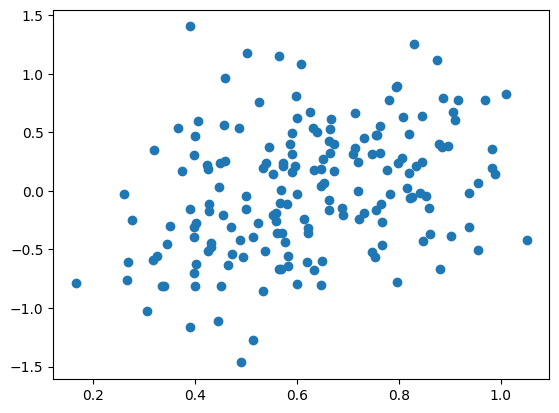

In [28]:
stanom = gist.sel(time=ragutime, lat=itcz, lon=ocean_only).tempanomaly.mean(['lat','lon']) #tropical-mean surf temp anomaly
bin = area_anom_itcz.sel(press=5, opt=0) #tropical-mean cc anomaly for one grid cell
plt.scatter(stanom, bin)

In [29]:
mat = np.zeros([7,6])
print(mat)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [30]:
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bin = area_anom_itcz.sel(press=p, opt=od)
        a = stats.linregress(stanom, bin,).slope
        mat[p, od] = a

sens_itcz = xa.DataArray(mat, 
                    coords={"press": area_itcz.press, "opt":area_itcz.opt, 
                           },
                   )

Text(0.5, 1.0, 'ITCZ cloud cover sensitivity to Ts')

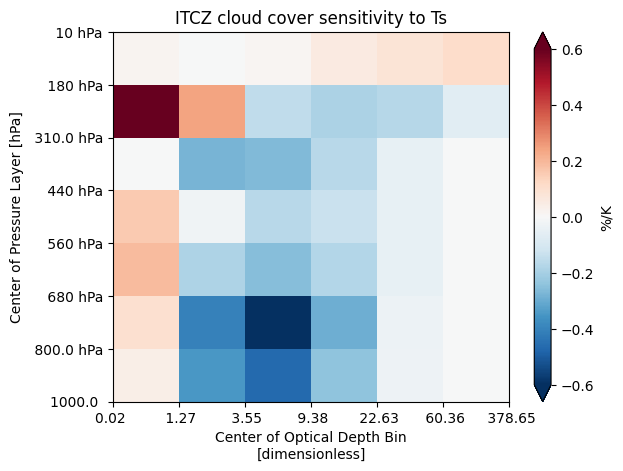

In [31]:
sens_itcz.plot(vmin=-0.6, vmax=0.6, cmap='RdBu_r', cbar_kwargs={'label': "%/K"})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_itcz.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_itcz.opt.comment.split('-')])
plt.title('ITCZ cloud cover sensitivity to Ts')
#plt.savefig('sens_itcz.png')

In [32]:
area_monthclim_ep = area_itcz.sel(time=ragutime, lon=ep).mean(['lat', 'lon']).groupby('time.month').mean('time')
area_anom_ep =   area_itcz.sel(time=ragutime, lon=ep).mean(['lat', 'lon']).groupby('time.month') - area_monthclim_ep
stanom = gist.sel(time=ragutime, lat=itcz, lon=slice(-150,-100)).tempanomaly.mean(['lat','lon'])
matx = np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bin = area_anom_ep.sel(press=p, opt=od)
        a = stats.linregress(stanom, bin,).slope
        matx[p, od] = a

sens_ep = xa.DataArray(matx, 
                    coords={"press": area_itcz.press, "opt":area_itcz.opt,},
                   )


Text(0.5, 1.0, 'EP cloud cover sensitivity to Ts')

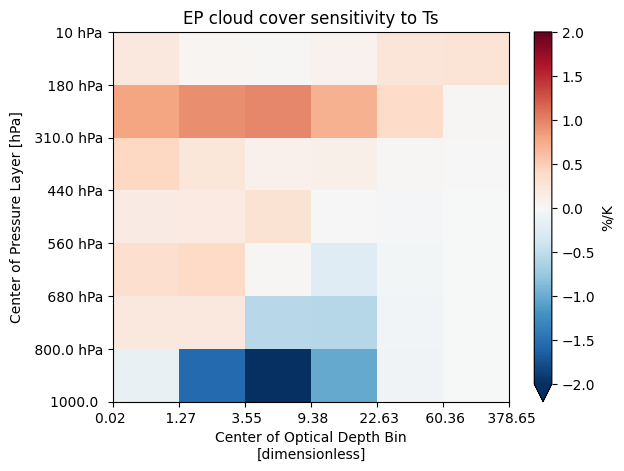

In [33]:
sens_ep.plot(vmin=-2, vmax=2, cmap='RdBu_r', cbar_kwargs={'label': "%/K"})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_itcz.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_itcz.opt.comment.split('-')])
plt.title('EP cloud cover sensitivity to Ts')
#plt.savefig('sens_itcz.png')

In [34]:
area_monthclim_wp = area_itcz.sel(time=ragutime, lon=wp).mean(['lat', 'lon']).groupby('time.month').mean('time')
area_anom_wp =   area_itcz.sel(time=ragutime, lon=wp).mean(['lat', 'lon']).groupby('time.month') - area_monthclim_wp
stanom = gist.sel(time=ragutime, lat=itcz, lon=wp).tempanomaly.mean(['lat','lon'])
matx = np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bin = area_anom_wp.sel(press=p, opt=od)
        a = stats.linregress(stanom, bin,).slope
        matx[p, od] = a

sens_wp = xa.DataArray(matx, 
                    coords={"press": area_itcz.press, "opt":area_itcz.opt,},
                   )


Text(0.5, 1.0, 'WP cloud cover sensitivity to Ts')

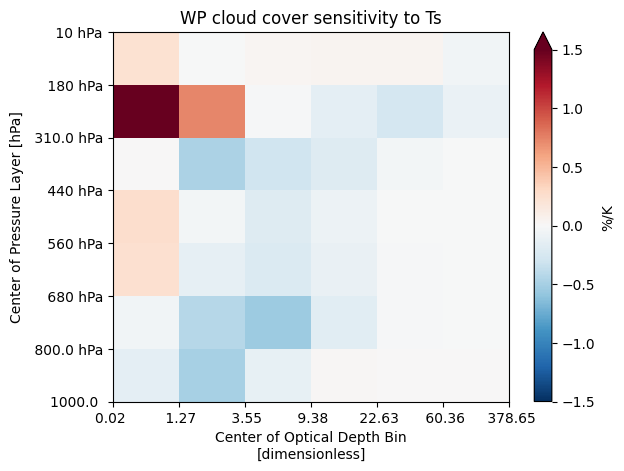

In [35]:
sens_wp.plot(vmin=-1.5, vmax=1.5, cmap='RdBu_r', cbar_kwargs={'label': "%/K"})
plt.yticks(np.arange(-0.5,7.5,1), [x.split(';')[0] for x in area_itcz.press.comment.split('-')])
plt.xticks(np.arange(-0.5,6.5,1), [x.split(';')[0] for x in area_itcz.opt.comment.split('-')])
plt.title('WP cloud cover sensitivity to Ts')
#plt.savefig('sens_itcz.png')

## Feedbacks

In [36]:
st_global_anom_raghu = xa.open_dataset("../daa/gistemp1200_GHCNv4_ERSSTv5.nc").sel(time=ragutime).tempanomaly
gmst_anom_raghu = st_global_anom_raghu.mean(["lat", "lon"])
gmst_anom_raghu

<xarray.DataArray 'tempanomaly' (time: 175)>
array([0.7340974 , 0.23327379, 0.95729756, 0.8614268 , 0.7519227 ,
       1.0922004 , 0.8929325 , 1.352061  , 0.81504446, 0.836583  ,
       1.0926229 , 0.87418526, 0.88721585, 0.81538546, 0.8026729 ,
       0.74833465, 0.78329533, 0.9279178 , 0.7491277 , 0.4308684 ,
       0.57933533, 0.8252324 , 0.76213413, 0.5808064 , 0.5128105 ,
       0.73623   , 0.23524523, 1.0493329 , 0.85042876, 0.897696  ,
       0.7350532 , 1.0022017 , 0.35257638, 0.4691111 , 0.53939843,
       0.8555002 , 0.60499626, 1.013537  , 0.6357572 , 0.8434752 ,
       0.8893668 , 1.2145516 , 1.0211686 , 0.9557888 , 1.0947794 ,
       1.2157406 , 1.0138409 , 0.95631033, 0.52678865, 0.5167096 ,
       0.75278026, 0.72439295, 1.0713508 , 1.1212677 , 0.7554194 ,
       0.9791476 , 0.8346643 , 1.1364185 , 0.6974942 , 0.61308104,
       0.73563844, 1.0516075 , 1.20542   , 0.64237183, 1.040495  ,
       1.1222516 , 0.9874921 , 0.741593  , 1.0008649 , 0.8086605 ,
       0.8067767 , 0.94092107, 0.59838474, 0.5052733 , 0.62883955,
       0.9030482 , 1.2009776 , 1.2291529 , 1.0252488 , 1.070745  ,
       0.41058978, 0.9647237 , 0.53505075, 0.4117598 , 0.8525466 ,
       0.53505576, 0.90635866, 1.2488089 , 0.8892305 , 1.1433235 ,
       1.0008904 , 1.0251968 , 0.87810683, 1.0118538 , 0.8973033 ,
       1.1997538 , 0.5171232 , 0.28966346, 1.0284582 , 1.27745   ,
       1.0165708 , 0.7508415 , 0.9387355 , 1.009296  , 1.0470483 ,
       1.1734626 , 0.82906574, 0.54116184, 0.6770232 , 0.467253  ,
       0.54045945, 0.6877988 , 1.3617765 , 1.3410127 , 1.1787759 ,
       1.5683585 , 1.6426196 , 1.5635158 , 1.0774184 , 1.084393  ,
       0.63541967, 0.7580301 , 1.2751191 , 1.0135058 , 1.3459395 ,
       1.6724263 , 1.236167  , 1.3205633 , 1.5236497 , 1.5926498 ,
       1.0683384 , 1.0246125 , 0.4507032 , 0.67102385, 0.865965  ,
       0.6286322 , 1.2118883 , 1.2656969 , 1.3161578 , 1.155193  ,
       1.3502097 , 1.1059822 , 0.99785405, 0.7904572 , 0.8272059 ,
       0.83624786, 0.8844463 , 0.78497994, 1.5440823 , 1.0414176 ,
       1.2594701 , 0.8982021 , 1.268688  , 1.591518  , 1.1411424 ,
       1.0027951 , 0.8239294 , 1.061956  , 1.1055168 , 1.1121824 ,
       1.4073085 , 1.282054  , 1.3524693 , 1.1168512 , 1.4573159 ,
       1.2325764 , 1.6206894 , 1.2819471 , 1.0475671 , 0.94187945,
       0.83421904, 1.2312609 , 1.1837292 , 1.7534827 , 1.0458105 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-06-15 2006-07-15 ... 2020-12-15

### Tropics

In [37]:
lwK_trop = (alllw.sel(lat=trop,).toa_lw_clr_mon.mean("lon") - alllw.sel(lat=trop,).toa_lw_cldtyp_mon.mean("lon"))/100
swK_trop = (allsw.sel(lat=trop,).toa_sw_clr_mon.mean("lon") - allsw.sel(lat=trop,).toa_sw_cldtyp_mon.mean("lon"))/100
K_trop = lwK_trop + swK_trop
K_trop

<xarray.DataArray (time: 245, lat: 60, opt: 6, press: 7)>
array([[[[-6.95322827e-02,  3.64839882e-02,  8.21122974e-02, ...,
           2.25793272e-01,  2.04872966e-01,  7.49827921e-02],
         [-1.62981927e-01, -6.67938590e-02,  3.76801491e-02, ...,
           3.13377500e-01,  4.12711978e-01,  3.57284546e-01],
         [-3.40756178e-01, -2.39068091e-01, -9.13528800e-02, ...,
           2.37454534e-01,  4.44557786e-01,             nan],
         [-5.62052011e-01, -4.30202931e-01, -2.85203397e-01, ...,
           5.42105436e-02,  2.92046666e-01,             nan],
         [-7.38983631e-01, -5.92498481e-01, -4.67242599e-01, ...,
          -9.60992575e-02,  1.48593426e-01,             nan],
         [-8.96904230e-01, -7.89884746e-01, -6.86066270e-01, ...,
          -2.32035637e-01,  6.15028143e-02,  3.62516999e-01]],

        [[-6.88544065e-02,  4.08401489e-02,  8.98803324e-02, ...,
           2.18167841e-01,  2.13180110e-01,  5.63667268e-02],
         [-1.70478523e-01, -6.60903454e-02,  3.68929505e-02, ...,
           3.18872720e-01,  4.23389077e-01,  1.86389953e-01],
         [-3.47768605e-01, -2.52343833e-01, -1.08421326e-01, ...,
           2.30587900e-01,  4.48855877e-01,             nan],
         [-5.74028909e-01, -4.45169687e-01, -3.01013947e-01, ...,
...
         [-5.82111537e-01, -4.98412758e-01, -3.26893866e-01, ...,
           1.11913681e-03,  2.41732001e-01,  4.70397115e-01],
         [-7.99845815e-01, -7.32915401e-01, -5.89658499e-01, ...,
          -2.09071517e-01,  6.41882420e-02,  3.20290089e-01],
         [-9.24576044e-01, -9.45141196e-01, -8.53852153e-01, ...,
          -4.16347384e-01, -8.28236341e-02,  1.66533470e-01]],

        [[-7.22350702e-02,  4.07077000e-02,  1.30738556e-01, ...,
           2.79527307e-01,  2.94779956e-01,  1.38402551e-01],
         [-1.86277747e-01, -5.88327497e-02,  8.49535763e-02, ...,
           3.26824635e-01,  4.33601975e-01,  4.36097473e-01],
         [-3.72210056e-01, -2.52781689e-01, -7.91501105e-02, ...,
           2.37427354e-01,  4.28874135e-01,  5.71606338e-01],
         [-5.75998962e-01, -4.85330641e-01, -2.98500687e-01, ...,
           9.08660889e-03,  2.44655848e-01,  4.12350535e-01],
         [-7.88951576e-01, -6.95055664e-01, -5.58004618e-01, ...,
          -1.87920213e-01,  7.74780512e-02,  3.48832726e-01],
         [-9.58500028e-01, -9.16851342e-01, -7.96981931e-01, ...,
          -3.94328713e-01, -4.34646606e-02,  1.93887115e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2022-11-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0

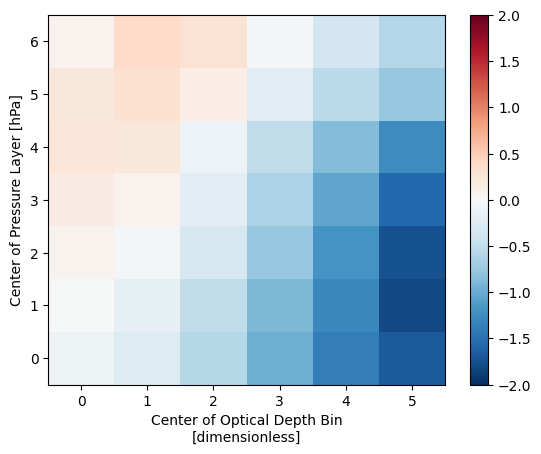

In [38]:
K_trop.sel(time=ragutime).mean(["lat","time"]).transpose().plot(vmin=-2.0, vmax=2.0, cmap="RdBu_r")

In [39]:
area_trop = alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).mean("lon")
area_trop

<xarray.DataArray 'cldarea_cldtyp_mon' (opt: 6, press: 7, time: 175, lat: 60)>
array([[[[4.77482319e+00, 5.02226162e+00, 5.16242743e+00, ...,
          2.16494608e+00, 2.15081525e+00, 2.07277870e+00],
         [4.51722145e+00, 4.83548832e+00, 5.08918667e+00, ...,
          2.71972108e+00, 2.50468397e+00, 2.34615517e+00],
         [4.64021873e+00, 4.89724636e+00, 4.93748856e+00, ...,
          2.14870048e+00, 2.13143158e+00, 2.10400009e+00],
         ...,
         [3.28330731e+00, 3.39397860e+00, 3.70451188e+00, ...,
          3.70897937e+00, 3.73532081e+00, 3.65436006e+00],
         [3.25836802e+00, 3.28956604e+00, 3.51775384e+00, ...,
          4.79785299e+00, 4.57180977e+00, 4.36482668e+00],
         [3.21994185e+00, 3.35124707e+00, 3.65379024e+00, ...,
          4.55027533e+00, 4.08226538e+00, 3.86918616e+00]],

        [[1.09758008e+00, 1.03997695e+00, 1.08841574e+00, ...,
          7.83931673e-01, 7.47724593e-01, 7.99743116e-01],
         [1.00218189e+00, 1.01517439e+00, 9.92286861e-01, ...,
          8.29659700e-01, 8.00920367e-01, 7.58405387e-01],
         [1.07729256e+00, 1.10082281e+00, 1.09152353e+00, ...,
          8.60529065e-01, 8.39912176e-01, 8.76820445e-01],
...
          2.43779138e-01, 2.73603112e-01, 3.03586125e-01],
         [3.35177988e-01, 3.84636462e-01, 3.83958519e-01, ...,
          1.93412647e-01, 2.57043600e-01, 3.03218126e-01],
         [4.25680846e-01, 4.21935201e-01, 4.30808514e-01, ...,
          1.22848578e-01, 1.77916139e-01, 2.17804506e-01]],

        [[1.00856442e-02, 2.13486645e-02, 2.86740772e-02, ...,
          3.46872807e-01, 2.83689111e-01, 2.21505105e-01],
         [4.22782777e-03, 7.37286918e-03, 1.07228197e-02, ...,
          2.46905535e-01, 3.43589634e-01, 3.16655099e-01],
         [7.77098816e-03, 1.59572600e-03, 8.86667706e-03, ...,
          3.40822190e-01, 2.53786951e-01, 2.06375107e-01],
         ...,
         [2.34973878e-02, 2.33413111e-02, 2.58799288e-02, ...,
          1.30886361e-01, 1.38567284e-01, 1.19242191e-01],
         [2.68065874e-02, 1.44536495e-02, 2.21328046e-02, ...,
          3.63527872e-02, 6.97409958e-02, 5.40896468e-02],
         [1.14930421e-01, 1.00078136e-01, 1.10727534e-01, ...,
          9.31469630e-03, 6.84348075e-03, 5.47284074e-03]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-06-15 2006-07-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0

In [40]:
cc_trop_anom = area_trop.groupby('time.month')- area_trop.groupby('time.month').mean('time')
R = K_trop*cc_trop_anom
R #cloud induced radiative anomaly but the anomaly comes from cc anomaly


<xarray.DataArray (time: 175, lat: 60, opt: 6, press: 7)>
array([[[[-4.41342220e-02,  6.03997055e-03,  5.38945133e-05, ...,
          -1.65570416e-02, -2.17114836e-01, -1.93289632e-03],
         [ 2.23323449e-01, -3.15666087e-02,  4.49086120e-03, ...,
          -8.14702064e-02, -2.80747950e-01, -3.61752394e-03],
         [ 4.01181757e-01,  1.01805814e-01, -6.60939002e-03, ...,
          -1.51558504e-01, -2.05628499e-01, -8.98861792e-04],
         [ 1.60412818e-01,  1.16227321e-01, -6.14382476e-02, ...,
          -3.06326691e-02, -1.43982425e-01,  2.64919153e-03],
         [-1.57200843e-02, -1.68480799e-02, -2.19022036e-02, ...,
          -1.86170870e-03, -5.79737946e-02, -2.21391651e-03],
         [-2.92665238e-04, -3.11413174e-03,  2.82306504e-03, ...,
          -2.19377573e-03, -1.07092154e-03, -4.58665192e-03]],

        [[-5.15261218e-02,  3.24363424e-03, -3.82744335e-03, ...,
          -5.35626225e-02, -2.84500331e-01, -2.47489871e-03],
         [ 2.05466211e-01, -3.64198722e-02,  4.25461959e-03, ...,
          -1.08036190e-01, -3.08887243e-01, -5.69072040e-03],
         [ 2.80499816e-01,  4.43548225e-02, -6.08737697e-04, ...,
          -1.53435871e-01, -2.63376176e-01, -2.27562687e-03],
         [ 7.66602159e-02,  7.85316825e-02, -4.46173586e-02, ...,
...
         [ 9.99573320e-02, -9.59969405e-03,  1.45109780e-02, ...,
           4.43481328e-03, -1.04151659e-01,             nan],
         [ 2.15752739e-02, -3.03921789e-01, -1.52009621e-01, ...,
           9.11430735e-03, -3.91253829e-02, -1.41787878e-03],
         [ 2.56205201e-02, -7.99832195e-02, -6.87506273e-02, ...,
           1.74370799e-02, -8.24137183e-04, -4.27179877e-03]],

        [[-3.02599613e-02,  6.24082424e-03, -4.97893663e-04, ...,
          -3.19053791e-02, -4.04224619e-02, -5.44725079e-03],
         [ 6.11802340e-02, -1.91718072e-03,  2.90304748e-03, ...,
           1.49702262e-02, -1.90907449e-01, -1.42150361e-03],
         [ 2.87700206e-01,  9.59377661e-02, -8.36490374e-03, ...,
           2.69699041e-02, -1.75050601e-01,             nan],
         [ 1.93015620e-01,  7.07263276e-02, -1.78324953e-02, ...,
           5.95340040e-03, -9.44547281e-02,             nan],
         [ 3.90165299e-02, -1.82869852e-01, -1.33673072e-01, ...,
           1.50323762e-02, -4.36633117e-02, -1.59374531e-03],
         [ 1.86080746e-02, -2.79211216e-02, -7.53519312e-02, ...,
          -5.71969850e-03, -3.89109668e-03, -3.64410435e-03]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-06-15 2006-07-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
    month    (time) int64 6 7 8 9 10 11 12 1 2 3 4 ... 2 3 4 5 6 7 8 9 10 11 12

In [41]:
lwR_trop = lwK_trop*cc_trop_anom
lwR_trop_mean = lwR_trop.mean(['lat'])
lw_feed =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bint = lwR_trop_mean.sel(press=p, opt=od)
        regress = stats.linregress(gmst_anom_raghu, bint).slope
        lw_feed[p, od] = regress

lwfeed_trops = xa.DataArray(lw_feed, 
                    coords={"press": lwR_trop_mean.press, "opt":lwR_trop_mean.opt, 
                           },
                   )

<xarray.DataArray ()>
array(-0.00534146)


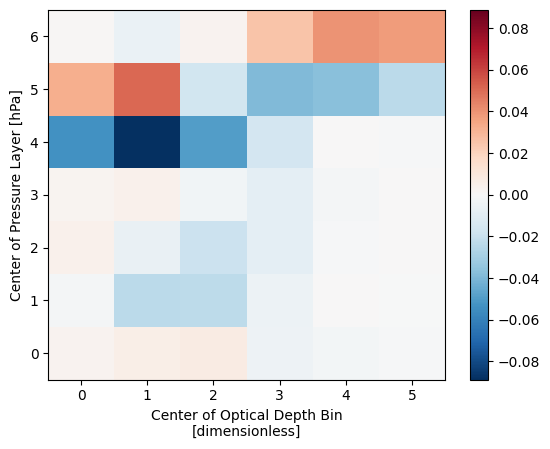

In [57]:
print(lwfeed_trops.mean(["press", "opt"]))
lwfeed_trops.plot() #vmin=-0.2,vmax=0.2,cmap="RdBu_r"

In [43]:
swR_trop = swK_trop*cc_trop_anom
swR_trop_mean = swR_trop.mean(['lat'])
sw_feed =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = swR_trop_mean.sel(press=p, opt=od)
        sw_regress = stats.linregress(gmst_anom_raghu, bints).slope
        sw_feed[p, od] = sw_regress

swfeed_trops = xa.DataArray(sw_feed, 
                    coords={"press": swR_trop_mean.press, "opt":swR_trop_mean.opt, 
                           },
                   )

<xarray.DataArray ()>
array(0.00686013)


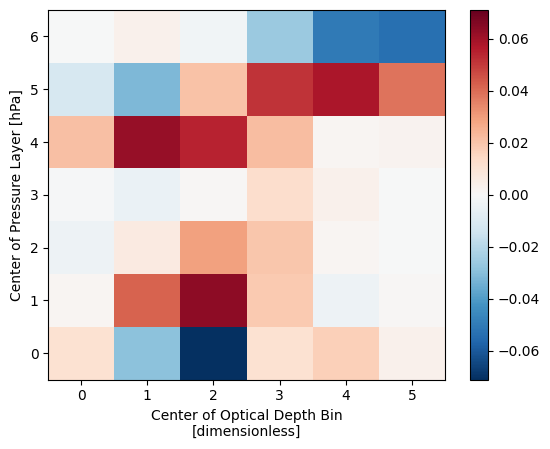

In [44]:
print(swfeed_trops.mean(["press", "opt"]))
(swfeed_trops).plot()

<xarray.DataArray ()>
array(0.00151866)


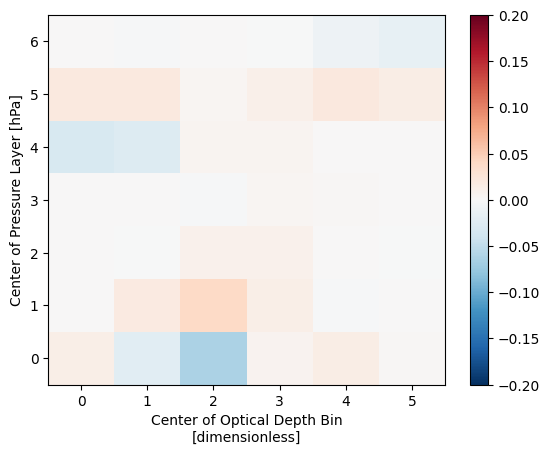

In [45]:
netfeed_trops = swfeed_trops + lwfeed_trops
print(netfeed_trops.mean(["press", "opt"]))
netfeed_trops.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

In [46]:
Rmean_trop = R.mean(["lat"]) #cloud induced radiative anomaly tropical mean
Rmean_trop
#K_trop_clim = netcre_tropics.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month').mean('time')
#K_trop_anom = netcre_tropics.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month') - netcre_trop_clim
#K_trop_anom

<xarray.DataArray (time: 175, opt: 6, press: 7)>
array([[[-1.71386395e-02, -3.05711408e-04, -4.15629940e-03, ...,
         -3.67577188e-02, -4.99688126e-02, -3.22717149e-03],
        [ 4.53426838e-02, -1.65655799e-02, -1.04838284e-03, ...,
         -2.95666922e-02,  8.81825015e-03, -2.48360890e-03],
        [ 9.38164219e-02,  1.96958724e-02,  1.38553474e-02, ...,
         -8.24777316e-03, -2.30405666e-02,  2.81268684e-03],
        [-5.85980788e-02,  1.53655773e-02,  2.04731654e-02, ...,
          3.96074690e-02, -3.98352928e-02,  4.48570028e-03],
        [-1.27395652e-02,  9.29315295e-03,  9.91964247e-03, ...,
          1.12434635e-02, -4.80027087e-02,  2.06377264e-03],
        [-3.70141643e-04,  8.16398067e-04,  1.48850540e-03, ...,
         -1.04742665e-02, -3.39456312e-02, -1.25914095e-02]],

       [[-2.35235933e-02, -1.21630066e-04,  3.78575060e-04, ...,
         -5.64406300e-03, -5.25127240e-02,  1.36601040e-03],
        [ 6.41203597e-02, -2.06742380e-02, -6.25903113e-03, ...,
          4.59096534e-03, -5.05260341e-02,  9.95063130e-03],
        [ 1.23734377e-01, -4.90128063e-02, -3.34660783e-02, ...,
          6.21404313e-03, -2.19106879e-02, -4.40951640e-04],
        [-1.25332680e-02, -5.84467798e-02, -6.76964596e-02, ...,
...
        [-1.84299916e-01,  3.88696790e-02,  3.39491330e-02, ...,
          2.35832296e-02,  1.50105646e-02,  1.72604073e-03],
        [-1.96693745e-02,  2.92948764e-02,  4.04601321e-02, ...,
          2.28481237e-02,  2.23394632e-02,  5.37025509e-03],
        [-9.89983138e-03,  5.31732105e-03,  1.21021755e-02, ...,
          1.16806151e-02,  6.12726668e-03,  1.31263258e-02]],

       [[-1.25825284e-02,  4.46080056e-04, -8.84521462e-04, ...,
         -2.37900782e-02,  2.76922695e-02, -1.51577536e-02],
        [-9.62999538e-02,  2.05605160e-02,  2.57313531e-03, ...,
         -1.03615429e-02,  2.82554757e-02, -4.51482658e-04],
        [-6.10523403e-01,  8.88847560e-02,  4.03931886e-02, ...,
          7.53862457e-03, -1.39375506e-02, -3.57632549e-03],
        [-4.39076066e-01,  5.46190739e-02,  6.06097318e-02, ...,
          2.77350824e-02, -4.28560842e-03,  4.77977144e-03],
        [-3.89527641e-02, -8.36831704e-03,  1.92076880e-02, ...,
          1.94613803e-02, -8.09276104e-03,  1.06908046e-02],
        [-2.32754629e-02, -4.28140163e-03,  2.56575388e-03, ...,
          9.45047103e-03,  1.38517804e-04,  9.64041892e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-06-15 2006-07-15 ... 2020-12-15
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
    month    (time) int64 6 7 8 9 10 11 12 1 2 3 4 ... 2 3 4 5 6 7 8 9 10 11 12

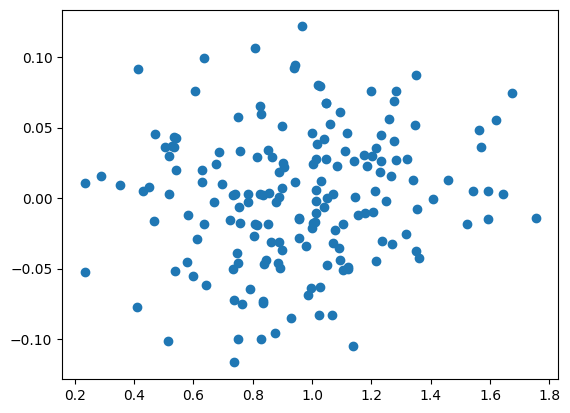

In [47]:
bin = Rmean_trop.sel(press=5, opt=0) 
plt.scatter(gmst_anom_raghu , bin)

In [48]:
trops_feed =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bint = Rmean_trop.sel(press=p, opt=od)
        regress = stats.linregress(gmst_anom_raghu, bint).slope
        trops_feed[p, od] = regress

feed_trops = xa.DataArray(trops_feed, 
                    coords={"press": Rmean_trop.press, "opt":Rmean_trop.opt, 
                           },
                   )

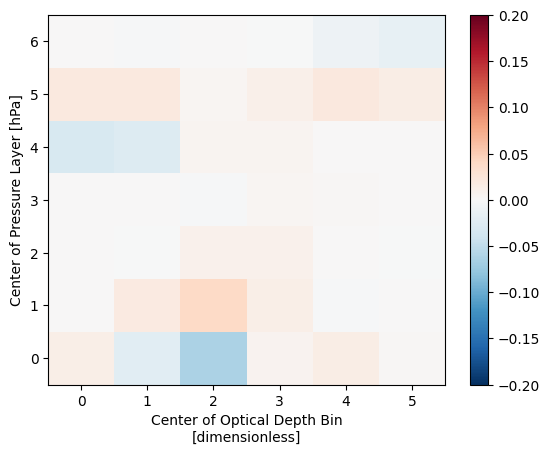

In [49]:
feed_trops.plot(vmin = -0.2, vmax=0.2, cmap="RdBu_r")

In [50]:
hcfeed_trop = feed_trops.sel(press=[4,5,6]).sum(["press","opt"])
hcfeed_trop

<xarray.DataArray ()>
array(0.01603078)

### ITCZ

In [51]:
netcre_ITCZ_clim = netcre_ITCZ.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month').mean('time')
netcre_ITCZ_anom = netcre_ITCZ.sel(time=ragutime).mean(['lat', 'lon']).groupby('time.month') - netcre_ITCZ_clim 
netcre_ITCZ_anom

<xarray.DataArray (time: 175, opt: 6, press: 7)>
array([[[-8.24789405e-02,  2.24910676e-04, -6.35851175e-05, ...,
         -7.94723034e-02,  5.02349138e-02, -7.36822933e-03],
        [-1.78067446e-01, -1.20401382e-04,  1.09106451e-02, ...,
         -1.48552358e-02,  6.93887472e-02, -2.26656348e-03],
        [ 3.51288319e-02, -3.50252390e-02,  4.35529351e-02, ...,
          8.44500661e-02,  5.81570864e-02,  4.46477905e-02],
        [-1.21896029e-01, -2.87559628e-02, -2.91180611e-02, ...,
          5.50510287e-02,  1.30225539e-01,  4.18721288e-02],
        [-4.18392301e-01, -1.52032077e-02, -3.77434343e-02, ...,
          3.55774164e-03,  1.23927474e-01,  1.24965250e-01],
        [ 2.81782597e-01,  1.11153908e-02, -6.48991019e-03, ...,
          1.34199858e-03,  1.47243738e-02,  8.10776949e-02]],

       [[-4.85377610e-02,  5.57179376e-03, -2.78976373e-03, ...,
         -9.94852185e-02, -1.91773117e-01, -4.61339951e-05],
        [-2.37038136e-02,  3.49899530e-02, -4.72060442e-02, ...,
          8.25060904e-03, -1.69791102e-01, -1.36810541e-03],
        [-4.39200401e-02,  3.44846249e-02, -1.03212714e-01, ...,
         -5.59774637e-02, -8.68886113e-02,  3.84361669e-03],
        [-4.53352451e-01, -4.42612171e-03, -5.89857101e-02, ...,
...
        [-1.10165465e+00, -2.92556524e-01, -1.05874956e-01, ...,
          6.78450465e-02,  1.77437067e-02,  1.68109424e-02],
        [-5.16987145e-01,  1.36855245e-03, -2.11548805e-03, ...,
          4.21230793e-02, -1.09928846e-02,  5.61169386e-02],
        [            nan,  6.61690310e-02,  1.02466643e-02, ...,
          7.36065209e-03,  6.07705116e-03,  3.89575958e-03]],

       [[-9.28400159e-02,  1.80062279e-03, -8.73422809e-03, ...,
         -2.00612068e-01, -6.87491894e-02, -6.07753173e-02],
        [-3.08254004e-01,  1.26625776e-01, -4.50760126e-04, ...,
         -5.92988580e-02, -5.70054054e-02, -3.51073146e-02],
        [-5.99982738e-01,  2.29260802e-01, -8.17835331e-04, ...,
         -2.51455009e-02, -6.53610826e-02, -2.40773931e-02],
        [-3.49591136e-01,  1.43475056e-01, -2.57237554e-02, ...,
          9.91719961e-03, -7.52816796e-02, -1.51792429e-02],
        [ 4.42972779e-03,  1.26958728e-01,  1.98335648e-02, ...,
          8.67643952e-03, -1.08263016e-01, -7.28284121e-02],
        [ 1.23903438e-01,  1.44331083e-01,  3.79755422e-02, ...,
         -2.32497230e-02, -1.04900062e-01, -6.62150979e-02]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-06-15 2006-07-15 ... 2020-12-15
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
    month    (time) int64 6 7 8 9 10 11 12 1 2 3 4 ... 2 3 4 5 6 7 8 9 10 11 12

In [52]:
bin = netcre_ITCZ_anom.sel(press=5, opt=0) #tropical-mean cc anomaly for one grid cell
plt.scatter(monthly_gmst.gmst , bin)

NameError: name 'monthly_gmst' is not defined

In [ ]:
itcz_feed =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bin = netcre_ITCZ_anom.sel(press=p, opt=od)
        regress = stats.linregress(monthly_gmst.gmst, bin,).slope
        itcz_feed[p, od] = regress

feed_itcz = xa.DataArray(itcz_feed, 
                    coords={"press": netcre_ITCZ_anom.press, "opt":netcre_ITCZ_anom.opt, 
                           },
                   )

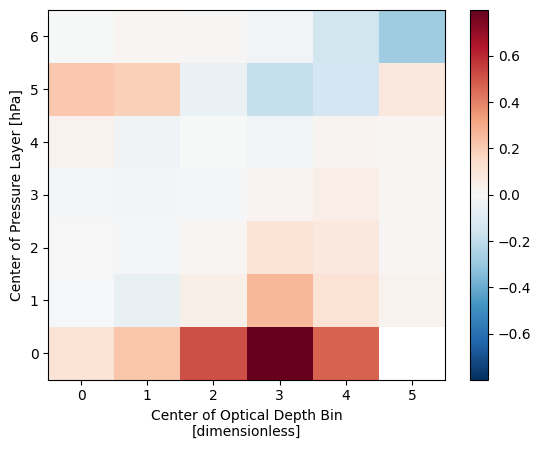

In [ ]:
feed_itcz.plot()

In [ ]:
feed_itcz.sel(press=[4,5,6]).sum(["press","opt"])

<xarray.DataArray ()>
array(0.78864158)

# Atlantic maps

In [ ]:
usemap_proj = ccrs.PlateCarree(central_longitude=180)
area = area_trop.sel(press=[6,5,4], lat=slice(-30,30), lon=slice(280,359)).sum([ 'press', 'opt']).mean(['time',])

plt.figure(figsize=(10,6))
ax1 = plt.axes(projection=usemap_proj)

plot = area.plot(extend='both',transform = ccrs.PlateCarree(), add_colorbar=False, cmap='Blues')#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')
plt.colorbar(plot,fraction=0.019, pad=0.04)
plt.title('High clouds area')
#plt.savefig("area_map.svg", bbox_inches="tight")
plt.show()

NameError: name 'area_trop' is not defined

In [ ]:
odweight.sel(lon=slice(280,359)).mean(['time'])

In [ ]:
plt.figure(figsize=(10,6))
ax1 = plt.axes(projection=usemap_proj)
odweight = tau_all.cldtau_cldtyp_mon.sel(press=[6,5,4]).weighted(area_trop.sel(press=[6,5,4])).mean(['press', 'opt'])
plot = odweight.sel(lon=slice(280,359)).mean(['time']).plot(cmap='OrRd', extend='both',transform = ccrs.PlateCarree(), add_colorbar=False, ax=ax1)#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')

plt.colorbar(plot,fraction=0.019, pad=0.04)
plt.title('Optical depth')
plt.show()

In [ ]:
data = cre_times.sel(press=[6,5,4]).sum(['press']).mean(['opt','time', ])

In [ ]:
plt.figure(figsize=(10,6))
ax1 = plt.axes(projection=usemap_proj)

plot = data.plot(extend='both',transform = ccrs.PlateCarree(), add_colorbar=False)#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')
plt.colorbar(plot,fraction=0.019, pad=0.04, label= "$Wm^{-2}$")
plt.title(f'Net CRE')
plt.show()

In [ ]:
global_cre_times = netCRE(alllw.sel(lat=trop), allsw.sel(lat=trop), by_frac=True)

NameError: name 'netCRE' is not defined

In [ ]:
data = global_cre_times.sel(press=[6,5,4]).sum(['press']).mean(['opt','time', ])

plt.figure(figsize=(10,10))
ax1 = plt.axes(projection=usemap_proj)

plot = data.plot(vmin=-4, vmax=4, extend='both',transform = ccrs.PlateCarree(), add_colorbar=False, cmap="RdBu_r")#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')
plt.colorbar(plot,fraction=0.019, pad=0.03, label= "$Wm^{-2}$")
plt.title(f'Net CRE')
plt.show()

# IWP

## Hadcrut

In [ ]:
st.tas_mean.plot()

In [ ]:
area = tau_all.cldarea_cldtyp_mon.sel(lat=trop, press=[4,5,6], time=timeMcKim).sum(["press", "opt"]).mean(['lat', 'lon'])
thick_area = tau_all.cldarea_cldtyp_mon.sel(lat=trop, lon=ocean_only, press=[4,5,6], opt=[4,5]).mean(['lat', 'lon']).sum(["press", "opt"])
thin_area = tau_all.cldarea_cldtyp_mon.sel(lat=trop, lon=ocean_only, press=[4,5,6], opt=[0,1]).mean(['lat', 'lon']).sum(["press", "opt"])

In [ ]:
area.mean()*0.01

In [ ]:
#average albedo of hc 
#weight and mean over all

In [ ]:
lnarea = np.log((area*0.01).groupby("time.year").mean("time"))
lnthick = np.log(thick_area.groupby("time.year").mean("time"))
lnthin = np.log(thin_area.groupby("time.year").mean("time"))
#sst_yearly = sst_itcz.groupby("time.year").mean("time")

In [ ]:
area.groupby("time.year").mean("time").plot()

In [ ]:
styear = st.sel(time=slice('2006-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')).tas_mean.groupby("time.year").mean("time")
styear.plot()

In [ ]:
plt.scatter(styear, lnarea)

In [ ]:
np.exp(-0.85), np.exp(-0.65)
timeMcKim=slice('2006-06-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')

In [ ]:
albedo_weight = albedo_all.toa_albedo_cldtyp_mon.sel(lat=trop,  press=[4,5,6], time=timeMcKim).weighted(area_trop).mean(['lat', 'lon', "press", "opt"])
albedo_weight.mean()

In [ ]:
albedo_thick = albedo_all.toa_albedo_cldtyp_mon.sel(lat=trop,  press=[4,5,6],  opt=[4,5]).mean(['lat', 'lon']).sum(["press", "opt"])
albedo_thin = albedo_all.toa_albedo_cldtyp_mon.sel(lat=trop,  press=[4,5,6],  opt=[0,1]).mean(['lat', 'lon']).sum(["press", "opt"])

In [ ]:
albedo_all.toa_albedo_cldtyp_mon #area weight

In [ ]:
lnal = np.log(albedo_weight.sel(time=slice('2006-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000')).groupby("time.year").mean("time"))

In [ ]:
def area_weight(var, ds, lat, lon=ocean_only, temp=True):
    ds = ds.sel(lat=lat, lon=lon)
    weights = ds.cldarea_cldtyp_mon

    if temp:
        weighted = ds[var].weighted(weights).mean(['lat', 'lon'])
    else:
        weighted = ds[var].weighted(weights).mean(['time'])
        
    return weighted.mean(["press", "opt"])

In [ ]:
albedo_weight.sel(time=slice('2006-01-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'))

In [ ]:
plt.scatter(styear, lnal)

In [ ]:
iwp_trop = area_weight("iwp_cldtyp_mon", iwp_all, lat=trop, temp=False)

usemap_proj = ccrs.PlateCarree(central_longitude=180)


plt.figure(figsize=(10,10))
ax1 = plt.axes(projection=usemap_proj)

plot = iwp_trop.plot(extend='both',transform = ccrs.PlateCarree(), add_colorbar=False, cmap='Blues')#, extend='both',transform=cart.crs.PlateCarree())

ax1.coastlines(resolution='50m') #transparent
#ax1.set_extent([data.lon.min().data.item(), data.lon.max().data.item(), data.lat.min().data.item(), data.lat.max().data.item()])
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k', linestyle='--')
ax1.add_patch(patches.Rectangle(xy=[120, 5], width=40, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
ax1.add_patch(patches.Rectangle(xy=[160, 5], width=40, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
ax1.add_patch(patches.Rectangle(xy=[210, 5], width=50, height=10, facecolor='none', edgecolor='k', transform=ccrs.PlateCarree()))
plt.colorbar(plot,fraction=0.019, pad=0.04)
plt.title('High clouds IWP')
#plt.savefig("area_map.svg", bbox_inches="tight")
plt.show()

# Reproducing Sokol's plots

Text(0.5, 1.0, 'Ice Water path')

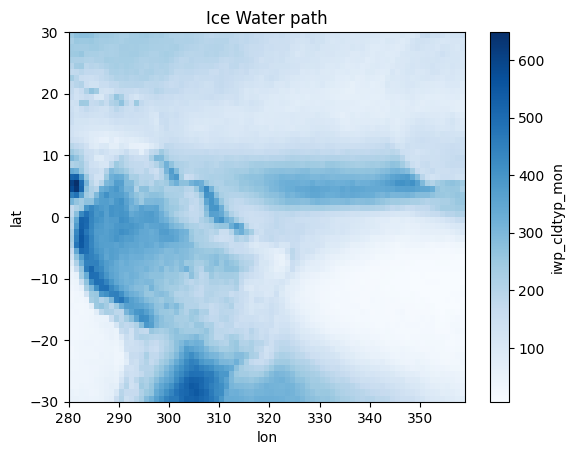

In [ ]:
iwp_trop = iwp_all.iwp_cldtyp_mon.sel(press=[4,5,6], ).weighted(iwp_all.cldarea_cldtyp_mon.sel(press=[4,5,6])).mean(["opt","press",])
iwp_trop.sel(lon=atlantic).mean(["time"]).plot(cmap="Blues")
plt.title("Ice Water path")

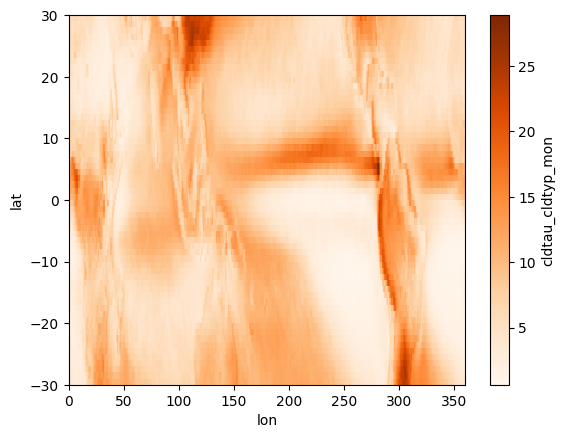

In [ ]:
tau_trop = tau_all.cldtau_cldtyp_mon.sel(press=[4,5,6]).weighted(tau_all.cldarea_cldtyp_mon.sel(press=[4,5,6])).mean(["opt","press"])
tau_trop.mean(["time"]).plot(cmap="Oranges")

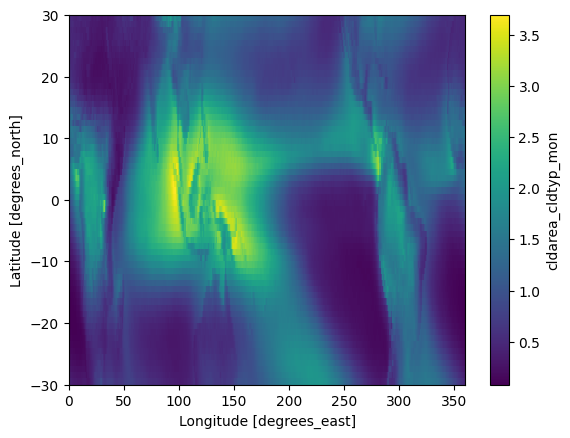

In [ ]:
area_trop = tau_all.cldarea_cldtyp_mon.sel(press=[4,5,6]).mean(["opt","press"])
area_ts = area_trop.mean(["lat", "lon"]) 
area_trop.mean(["time"]).plot()

In [ ]:
iwp_ts = iwp_trop.mean(["lat", "lon"]) 
tau_ts = tau_trop.mean(["lat", "lon"]) 
iwp_trop_clim = iwp_ts.groupby("time.month").mean("time")
tau_trop_clim = tau_ts.groupby("time.month").mean("time")
iwp_trop_anom = iwp_ts.groupby("time.month") - iwp_trop_clim
tau_trop_anom = tau_ts.groupby("time.month") - tau_trop_clim

Text(0.5, 1.0, 'Global tropics')

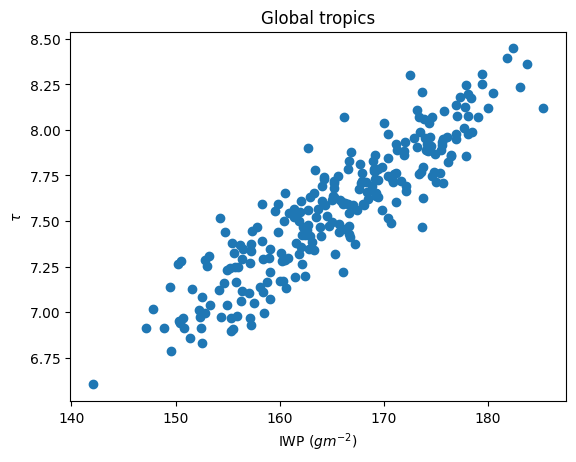

In [ ]:
plt.scatter(iwp_ts,tau_ts)
plt.xlabel("IWP ($gm^{-2}$)")
plt.ylabel(r"$\tau$")
plt.title("Global tropics")

Text(0.5, 1.0, 'ITCZ')

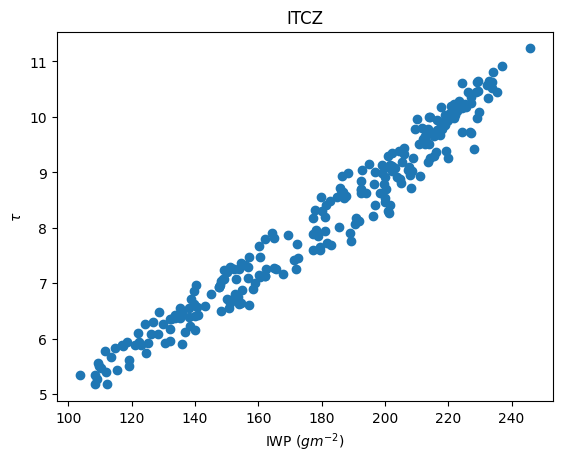

In [ ]:
plt.scatter(iwp_trop.sel(lat=itcz).mean(["lat", "lon"]) , tau_trop.sel(lat=itcz).mean(["lat", "lon"]) )
plt.xlabel("IWP ($gm^{-2}$)")
plt.ylabel(r"$\tau$")
plt.title("ITCZ")

Text(0.5, 1.0, 'EP')

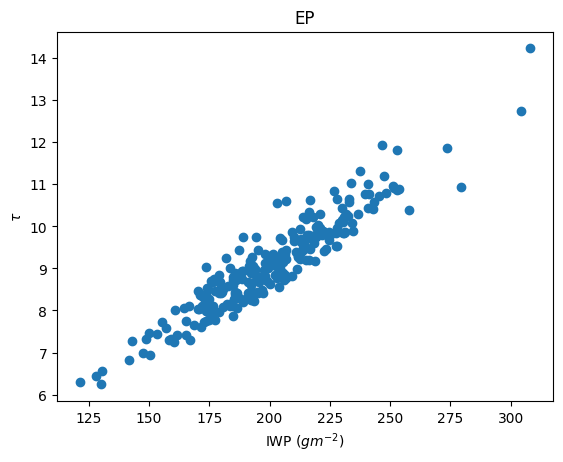

In [ ]:
plt.scatter(iwp_trop.sel(lat=itcz, lon=ep).mean(["lat", "lon"]) , tau_trop.sel(lat=itcz, lon=ep).mean(["lat", "lon"]) )
plt.xlabel("IWP ($gm^{-2}$)")
plt.ylabel(r"$\tau$")
plt.title("EP")

Text(0.5, 1.0, 'WP')

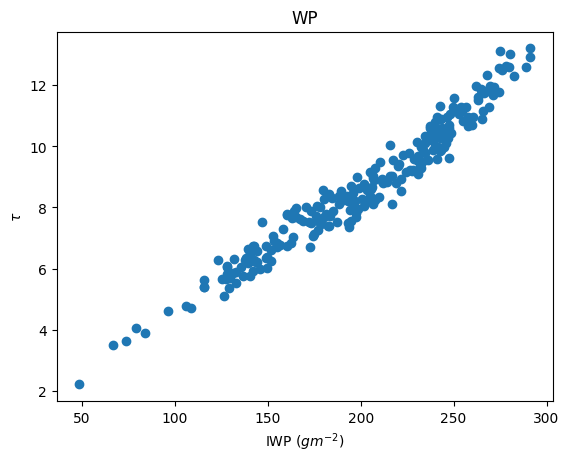

In [ ]:
plt.scatter(iwp_trop.sel(lat=itcz, lon=wp).mean(["lat", "lon"]) , tau_trop.sel(lat=itcz, lon=wp).mean(["lat", "lon"]))
plt.xlabel("IWP ($gm^{-2}$)")
plt.ylabel(r"$\tau$")
plt.title("WP")

# Effective radius

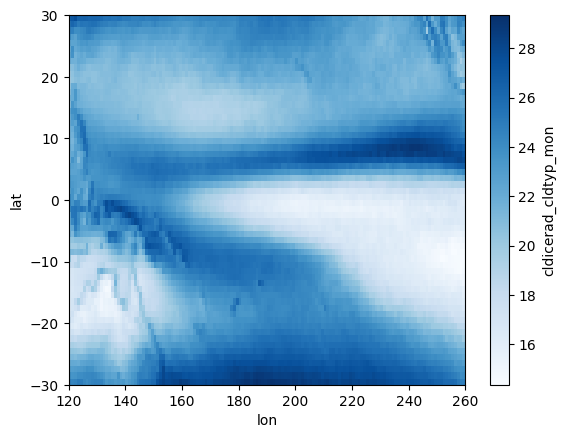

In [ ]:
rei_trop = rei_all.cldicerad_cldtyp_mon.sel(press=[4,5,6]).weighted(rei_all.cldarea_cldtyp_mon.sel(press=[4,5,6])).mean(["opt","press",])
rei_trop.sel(lon=ocean_only).mean(["time"]).plot(cmap="Blues")

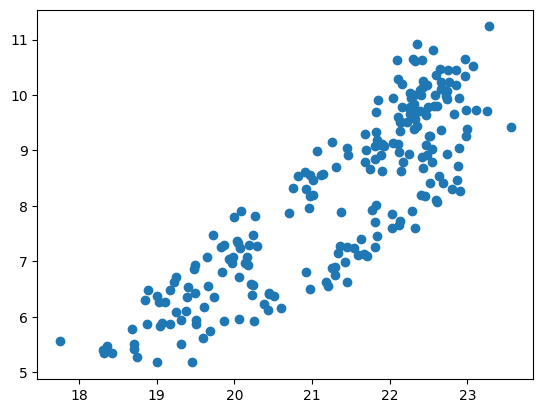

In [ ]:
plt.scatter( rei_trop.sel(lat=itcz, time=ragutime).mean(["lat", "lon"]), tau_trop.sel(lat=itcz, time=ragutime).mean(["lat", "lon"]) )


Text(0.5, 1.0, 'Global tropics')

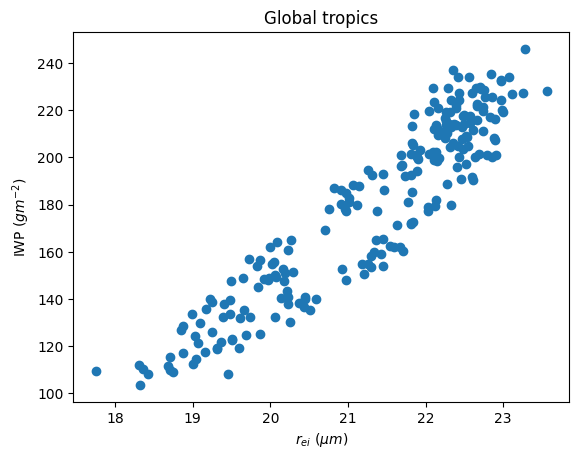

In [ ]:
plt.scatter(rei_trop.sel(lat=itcz, time=ragutime).mean(["lat", "lon"]), iwp_trop.sel(lat=itcz, time=ragutime).mean(["lat", "lon"])  )
plt.ylabel("IWP ($gm^{-2}$)")
plt.xlabel(r"$r_{ei}~(\mu m)$")
plt.title("Global tropics")

Text(0.5, 1.0, 'ITCZ')

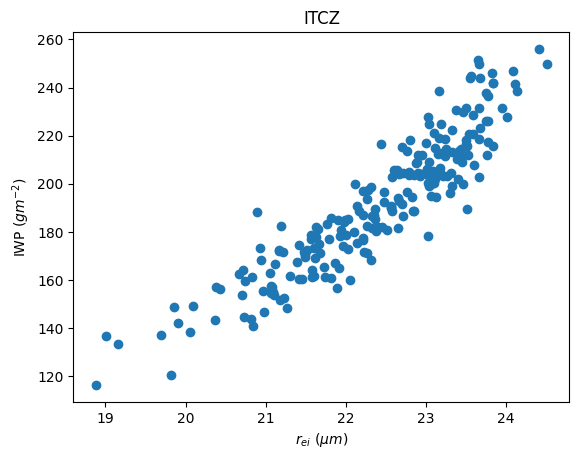

In [ ]:
plt.scatter( rei_trop.sel(lat=itcz, lon=ocean_only, time=ragutime).mean(["lat", "lon"]), iwp_trop.sel(lat=itcz, lon=ocean_only, time=ragutime).mean(["lat", "lon"])   )
plt.ylabel("IWP ($gm^{-2}$)")
plt.xlabel(r"$r_{ei}~(\mu m)$")
plt.title("ITCZ")

Text(0.5, 1.0, 'wp')

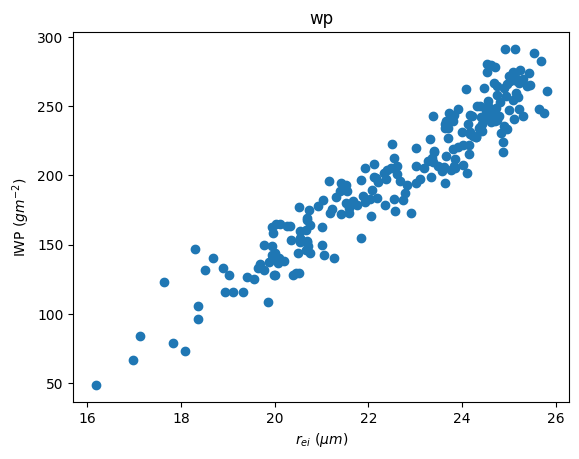

In [ ]:
plt.scatter(rei_trop.sel(lat=itcz, lon=wp, time=ragutime).mean(["lat", "lon"]), iwp_trop.sel(lat=itcz, lon=wp, time=ragutime).mean(["lat", "lon"]) )
plt.ylabel("IWP ($gm^{-2}$)")
plt.xlabel(r"$r_{ei}~(\mu m)$")
plt.title("wp")

Text(0.5, 1.0, 'EP')

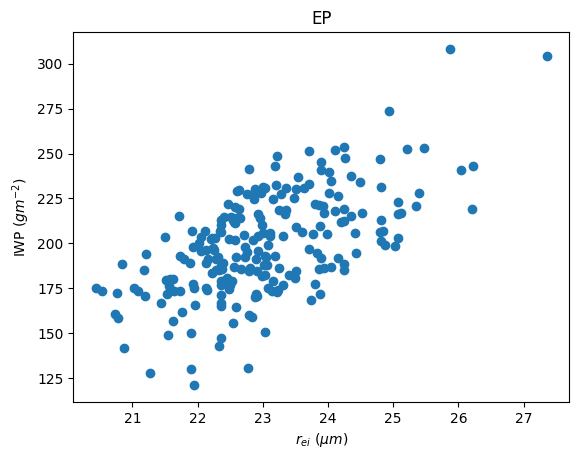

In [ ]:
plt.scatter(rei_trop.sel(lat=itcz, lon=ep, time=ragutime).mean(["lat", "lon"]), iwp_trop.sel(lat=itcz, lon=ep, time=ragutime).mean(["lat", "lon"]) )
plt.ylabel("IWP ($gm^{-2}$)")
plt.xlabel(r"$r_{ei}~(\mu m)$")
plt.title("EP")